In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss 
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("../data/processed/csv/input.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<BarContainer object of 16 artists>

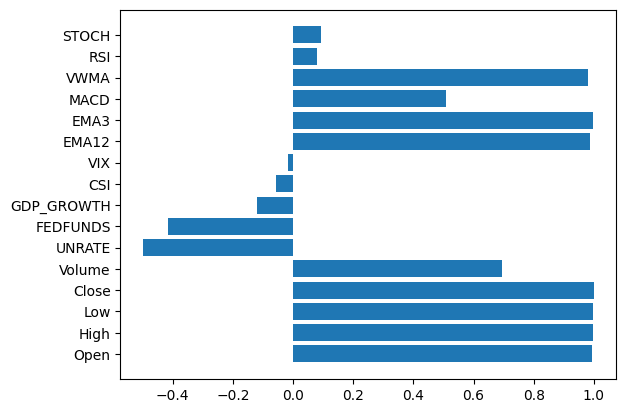

In [15]:
correlations = data.drop(columns='Adj Close').corrwith(data['Adj Close'], method='spearman')
plt.barh(y=correlations.index, width=correlations.values)

<Axes: >

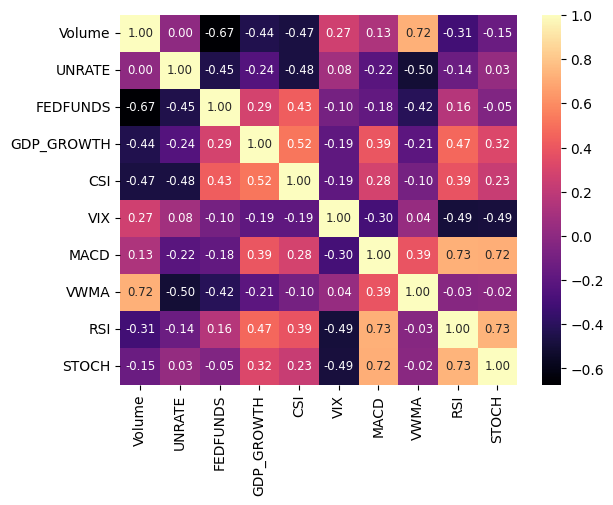

In [16]:
correlations = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close','EMA3', 'EMA12']).corr(method='spearman')
sns.heatmap(correlations,cmap='magma', fmt='.2f', annot=True, annot_kws={'fontsize':'small'})

In [17]:
l = len(data.columns)
stationarity_test = pd.DataFrame({'adf test p-value':np.zeros(l), 'kpss test p-value': np.zeros(l) ,'is stationary':np.empty(l, dtype=str)}, index=data.columns)

In [21]:
for col in data.columns:
    adf = adfuller(data[col].values)[1]
    kps = kpss(data[col].values)[1]
    stationarity_test.loc[col, 'adf test p-value'] = adf 
    stationarity_test.loc[col, 'kpss test p-value'] = kps
    if adf <= 0.05 or kps >= 0.05:
        stationarity_test.loc[col, 'is stationary'] = 'yes'
    else: stationarity_test.loc[col, 'is stationary'] = 'no'

stationarity_test.to_csv('files/stationarity_test.csv')
stationarity_test

,adf test p-value,kpss test p-value,is stationary
Open,0.995714,0.010000,no
High,0.997503,0.010000,no
Low,0.997423,0.010000,no
Close,0.998517,0.010000,no
Adj Close,0.998517,0.010000,no
Volume,0.619943,0.010000,no
UNRATE,0.021782,0.100000,yes
FEDFUNDS,0.036170,0.010000,yes
GDP_GROWTH,0.007708,0.094749,yes
CSI,0.391182,0.018641,no
